# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../EmLinesModel_Results'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_rmshared_revised.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_rmshared_revised.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [5]:
param_short = parameters.iloc[:900]

# Posteriors

In [6]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-12.187872,107.652765,-218.487915,-0.068169,-0.014077,-4.562748,43.272291,-100.723852,0.205079,0.117344,...,5.041107,-59.315118,149.961612,-0.223876,-0.945536,-3.669918,27.459816,-46.362887,-0.397376,0.223145
1,-11.399028,96.402363,-194.169729,-0.350926,0.420846,-2.778258,31.618536,-96.240046,0.395766,0.047736,...,0.102390,-2.660499,-2.127995,0.121996,-0.345262,-2.291965,10.805416,5.558238,-0.632260,-0.059929
2,-10.597359,90.666617,-177.108472,-0.214381,-0.110351,-3.479320,30.153927,-70.409865,0.228308,0.102696,...,-3.142631,37.522926,-120.853234,-0.250283,-0.305395,-0.600042,-1.745767,15.866603,0.031647,0.151940
3,-8.879341,75.106981,-150.363251,0.065239,-0.060980,-1.344217,14.005408,-46.534047,0.358632,0.072889,...,6.298590,-54.760554,95.200227,0.071514,-0.694375,-1.934135,15.978438,-45.563740,0.284740,0.394396
4,-9.004124,73.956605,-148.065263,0.083866,0.220893,-3.148192,33.315412,-92.163772,0.283440,0.066849,...,7.558020,-68.390533,113.705120,2.510280,0.232269,-1.472172,5.751046,12.362552,-0.486874,0.032497
5,-11.278493,95.537927,-193.264592,-0.085815,0.205122,-5.548649,48.894333,-103.200318,-0.323149,0.262688,...,8.592924,-72.272151,95.670491,3.388541,0.591769,-3.878703,25.179626,-28.077448,-0.837301,0.080280
6,-8.122827,73.821860,-165.240832,0.065068,0.338746,-5.088281,48.973787,-124.412209,0.308369,0.211113,...,5.259527,-26.346877,-60.235113,3.863860,0.680505,-0.922656,3.631337,11.746272,-0.292026,-0.186669
7,-11.116616,89.858548,-167.817978,-0.397634,0.002647,-3.606579,38.284378,-104.968243,0.381461,0.241698,...,8.289012,-51.527129,-26.325592,3.877568,1.018447,0.458917,-15.203308,64.183541,-0.306121,-0.013604
8,-9.995740,78.765510,-145.157701,-0.278246,0.259866,-4.986891,55.656778,-149.895163,0.362309,-0.118846,...,9.786922,-47.614572,-74.150935,5.112579,1.364821,2.490556,-27.547631,66.808999,0.409728,0.036043
9,-9.344343,75.739879,-152.178132,0.234031,0.131032,-4.730022,40.796317,-89.161150,-0.001119,0.205941,...,4.372643,-37.388934,27.180198,1.999781,0.426274,0.709881,-15.646854,58.353285,-0.233383,-0.091742


In [7]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [8]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

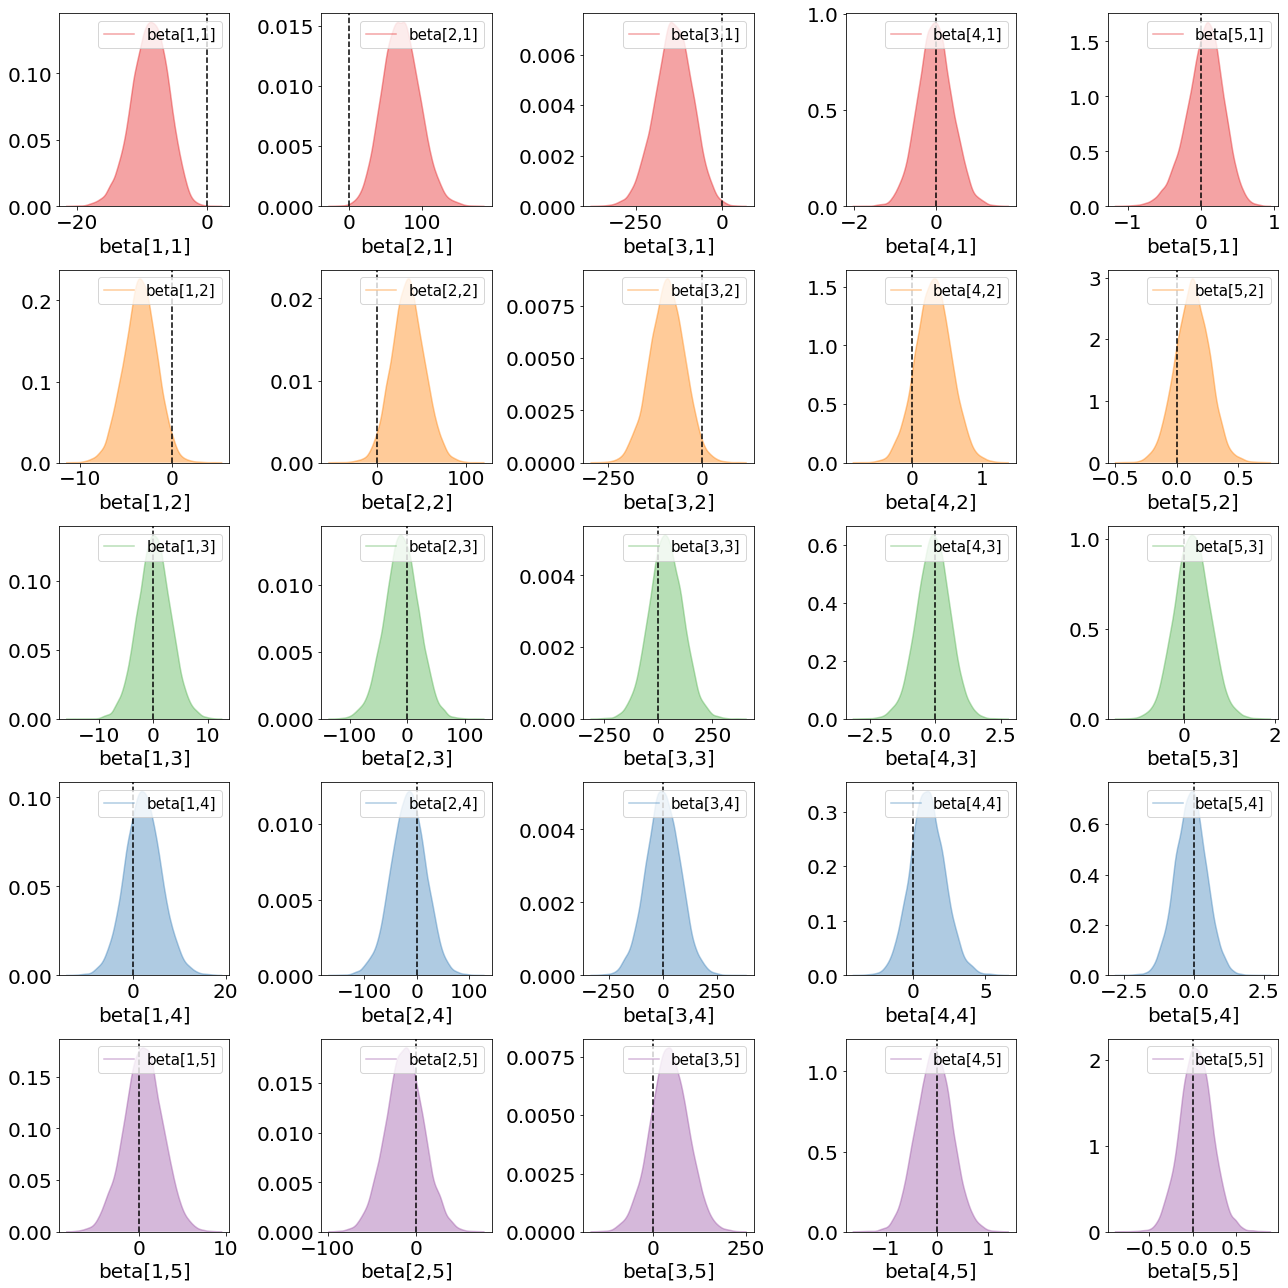

In [11]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
#         plt.xlim([-1.5,1.5])
#         plt.ylim([0,4.5])      
#         if (each_class==0):
#             plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
#         elif (each_class!=0): 
#             plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
# plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
# plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [12]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_rmshared_revised.csv'))

In [13]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1,1]', 'beta[2,1]', 'beta[3,1]',
       'beta[4,1]', 'beta[5,1]', 'beta[1,2]', 'beta[2,2]',
       ...
       'eta05[898]', 'eta05[899]', 'eta05[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=9035)

In [14]:
header = np.array(entire_fit.keys())

In [15]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [16]:
probabilities = entire_fit[prob_keys]

In [17]:
probabilities

,prob01[1],prob01[2],prob01[3],prob01[4],prob01[5],prob01[6],prob01[7],prob01[8],prob01[9],prob01[10],...,prob05[891],prob05[892],prob05[893],prob05[894],prob05[895],prob05[896],prob05[897],prob05[898],prob05[899],prob05[900]
0,0.003004,0.006235,0.012383,0.023492,0.042431,0.072657,0.117381,0.178111,0.253170,0.337335,...,0.708043,0.713574,0.717287,0.719224,0.719407,0.717838,0.714500,0.709354,0.702345,0.693400
1,0.290831,0.442114,0.596254,0.726325,0.821410,0.884884,0.925311,0.950631,0.966512,0.976590,...,0.227231,0.251440,0.277510,0.305402,0.335029,0.366257,0.398900,0.432722,0.467442,0.502739
2,0.003658,0.006828,0.012302,0.021362,0.035691,0.057236,0.087877,0.128851,0.180113,0.239922,...,0.770664,0.781910,0.793239,0.804594,0.815917,0.827149,0.838234,0.849119,0.859752,0.870087
3,0.005393,0.008989,0.014538,0.022799,0.034630,0.050898,0.072313,0.099231,0.131470,0.168213,...,0.939976,0.935302,0.929736,0.923128,0.915297,0.906026,0.895059,0.882094,0.866783,0.848733
4,0.051150,0.082123,0.126211,0.184885,0.257312,0.339829,0.426584,0.511192,0.588478,0.655409,...,0.450134,0.479782,0.510150,0.541017,0.572139,0.603253,0.634090,0.664381,0.693868,0.722313
5,0.027390,0.051265,0.090911,0.151468,0.235083,0.337903,0.449770,0.558068,0.652970,0.730034,...,0.291514,0.312364,0.332836,0.352759,0.371982,0.390368,0.407802,0.424190,0.439453,0.453530
6,0.267561,0.371483,0.481114,0.585117,0.675315,0.748371,0.804817,0.847163,0.878412,0.901282,...,0.212688,0.229127,0.246846,0.265892,0.286298,0.308082,0.331242,0.355751,0.381559,0.408584
7,0.010277,0.019172,0.034432,0.059307,0.097492,0.152089,0.223988,0.310408,0.404869,0.499102,...,0.486592,0.532364,0.580522,0.629995,0.679499,0.727652,0.773120,0.814766,0.851769,0.883686
8,0.106027,0.171538,0.260249,0.367788,0.483531,0.594546,0.690903,0.768305,0.827220,0.870592,...,0.771559,0.784922,0.799717,0.815621,0.832280,0.849320,0.866362,0.883041,0.899023,0.914023
9,0.011878,0.019781,0.031880,0.049633,0.074507,0.107636,0.149407,0.199114,0.254858,0.313816,...,0.334803,0.368758,0.406695,0.448475,0.493721,0.541779,0.591710,0.642327,0.692286,0.740214


In [18]:
probabilities_transposed = probabilities.T

In [19]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=12000, step=1)


In [20]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

12000


In [21]:
probabilities_transposed.columns = new_header

In [22]:
probabilities_transposed

,itr0,itr1,itr2,itr3,itr4,itr5,itr6,itr7,itr8,itr9,...,itr11990,itr11991,itr11992,itr11993,itr11994,itr11995,itr11996,itr11997,itr11998,itr11999
prob01[1],0.003004,0.290831,0.003658,0.005393,0.051150,0.027390,0.267561,0.010277,0.106027,0.011878,...,0.067474,0.036472,0.047020,0.002114,0.068555,0.045369,0.008408,0.151186,0.029865,0.071972
prob01[2],0.006235,0.442114,0.006828,0.008989,0.082123,0.051265,0.371483,0.019172,0.171538,0.019781,...,0.099337,0.062607,0.069860,0.002741,0.099091,0.101763,0.015629,0.199774,0.042417,0.097055
prob01[3],0.012383,0.596254,0.012302,0.014538,0.126211,0.090911,0.481114,0.034432,0.260249,0.031880,...,0.141098,0.102741,0.100724,0.003529,0.138036,0.205791,0.027816,0.256731,0.058804,0.127939
prob01[4],0.023492,0.726325,0.021362,0.022799,0.184885,0.151468,0.585117,0.059307,0.367788,0.049633,...,0.192954,0.160201,0.140625,0.004509,0.185113,0.362483,0.047277,0.320541,0.079515,0.164716
prob01[5],0.042431,0.821410,0.035691,0.034630,0.257312,0.235083,0.675315,0.097492,0.483531,0.074507,...,0.253736,0.235945,0.189763,0.005718,0.238937,0.544844,0.076490,0.388771,0.104808,0.206999
prob01[6],0.072657,0.884884,0.057236,0.050898,0.339829,0.337903,0.748371,0.152089,0.594546,0.107636,...,0.320870,0.326941,0.247212,0.007197,0.297128,0.707425,0.117422,0.458441,0.134608,0.253885
prob01[7],0.117381,0.925311,0.087877,0.072313,0.426584,0.449770,0.804817,0.223988,0.690903,0.149407,...,0.390812,0.426102,0.310868,0.008990,0.356737,0.824124,0.170590,0.526551,0.168449,0.304025
prob01[8],0.178111,0.950631,0.128851,0.099231,0.511192,0.558068,0.847163,0.310408,0.768305,0.199114,...,0.459798,0.524430,0.377745,0.011144,0.414800,0.897039,0.234305,0.590561,0.205470,0.355779
prob01[9],0.253170,0.966512,0.180113,0.131470,0.588478,0.652970,0.878412,0.404869,0.827220,0.254858,...,0.524594,0.614120,0.444544,0.013708,0.468837,0.939548,0.304661,0.648700,0.244496,0.407435
prob01[10],0.337335,0.976590,0.239922,0.168213,0.655409,0.730034,0.901282,0.499102,0.870592,0.313816,...,0.582960,0.690579,0.508276,0.016732,0.517113,0.963769,0.376468,0.700028,0.284172,0.457416


In [23]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [24]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
prob01[1],12000.0,0.071732,0.112948,9.081398e-08,0.000091,0.004769,0.024231,0.086291,0.416974,0.914305
prob01[2],12000.0,0.104951,0.150406,1.371164e-07,0.000141,0.007609,0.039265,0.136041,0.556835,0.949220
prob01[3],12000.0,0.145730,0.190301,2.019788e-07,0.000211,0.012008,0.061693,0.204627,0.687176,0.969524
prob01[4],12000.0,0.191988,0.228614,2.902698e-07,0.000310,0.018102,0.092585,0.292488,0.801003,0.981341
prob01[5],12000.0,0.241145,0.262348,4.069842e-07,0.000430,0.026374,0.132227,0.390035,0.877860,0.988299
prob01[6],12000.0,0.290786,0.290200,5.567149e-07,0.000547,0.037179,0.183048,0.495606,0.923712,0.993721
prob01[7],12000.0,0.338950,0.312103,7.429640e-07,0.000731,0.050384,0.244426,0.591644,0.952721,0.996542
prob01[8],12000.0,0.384221,0.328592,9.673472e-07,0.000937,0.066469,0.311797,0.679458,0.970369,0.998011
prob01[9],12000.0,0.425719,0.340436,1.228787e-06,0.001205,0.086131,0.382192,0.750190,0.980803,0.998961
prob01[10],12000.0,0.463015,0.348481,1.522826e-06,0.001463,0.108496,0.448441,0.805542,0.987524,0.999437


In [25]:
print(shrinked_df.values.shape, parameters.shape)

(4500, 10) (4500, 2)


In [26]:
loc = shrinked_df.iloc[0, :].size
print(loc)

10


In [27]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [28]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [29]:
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],12000.0,0.071732,0.112948,9.081398e-08,0.000091,0.004769,0.024231,0.086291,0.416974,0.914305,9.729482,0.067940
prob01[2],12000.0,0.104951,0.150406,1.371164e-07,0.000141,0.007609,0.039265,0.136041,0.556835,0.949220,9.729482,0.077608
prob01[3],12000.0,0.145730,0.190301,2.019788e-07,0.000211,0.012008,0.061693,0.204627,0.687176,0.969524,9.729482,0.087275
prob01[4],12000.0,0.191988,0.228614,2.902698e-07,0.000310,0.018102,0.092585,0.292488,0.801003,0.981341,9.729482,0.096943
prob01[5],12000.0,0.241145,0.262348,4.069842e-07,0.000430,0.026374,0.132227,0.390035,0.877860,0.988299,9.729482,0.106610
prob01[6],12000.0,0.290786,0.290200,5.567149e-07,0.000547,0.037179,0.183048,0.495606,0.923712,0.993721,9.729482,0.116278
prob01[7],12000.0,0.338950,0.312103,7.429640e-07,0.000731,0.050384,0.244426,0.591644,0.952721,0.996542,9.729482,0.125946
prob01[8],12000.0,0.384221,0.328592,9.673472e-07,0.000937,0.066469,0.311797,0.679458,0.970369,0.998011,9.729482,0.135613
prob01[9],12000.0,0.425719,0.340436,1.228787e-06,0.001205,0.086131,0.382192,0.750190,0.980803,0.998961,9.729482,0.145281
prob01[10],12000.0,0.463015,0.348481,1.522826e-06,0.001463,0.108496,0.448441,0.805542,0.987524,0.999437,9.729482,0.154948


In [30]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_rmshared_revised.csv'))

In [31]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [32]:
zu = np.unique(prob02['LOG_STELLAR_MASS'].values)

In [33]:
subset = prob02[prob02['LOG_STELLAR_MASS'].values==zu[0]]

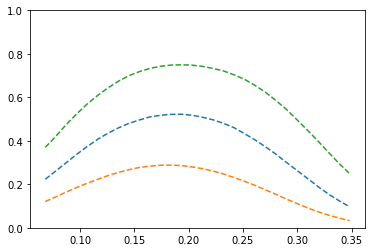

In [34]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,1.])
plt.show()

In [35]:
np.unique(prob01['Z'].values)

array([0.06794   , 0.07760759, 0.08727517, 0.09694276, 0.10661034,
       0.11627793, 0.12594552, 0.1356131 , 0.14528069, 0.15494828,
       0.16461586, 0.17428345, 0.18395103, 0.19361862, 0.20328621,
       0.21295379, 0.22262138, 0.23228897, 0.24195655, 0.25162414,
       0.26129172, 0.27095931, 0.2806269 , 0.29029448, 0.29996207,
       0.30962966, 0.31929724, 0.32896483, 0.33863241, 0.3483    ])

In [36]:
subset = prob01[prob01['Z']<0.07]

In [37]:
subset

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],12000.0,0.071732,0.112948,9.081398e-08,0.000091,0.004769,0.024231,0.086291,0.416974,0.914305,9.729482,0.06794
prob01[31],12000.0,0.054594,0.081921,3.625932e-07,0.000165,0.005259,0.021979,0.068448,0.295553,0.802335,9.796692,0.06794
prob01[61],12000.0,0.042085,0.058433,1.342719e-06,0.000275,0.005793,0.020057,0.054566,0.211309,0.635979,9.863902,0.06794
prob01[91],12000.0,0.033385,0.042193,3.561931e-06,0.000457,0.006240,0.018399,0.043724,0.153631,0.473668,9.931112,0.06794
prob01[121],12000.0,0.027513,0.031724,8.768233e-06,0.000684,0.006674,0.016788,0.036641,0.117658,0.327333,9.998322,0.06794
prob01[151],12000.0,0.023629,0.025302,2.012379e-05,0.000969,0.006822,0.015169,0.031678,0.095190,0.248968,10.065532,0.06794
prob01[181],12000.0,0.021122,0.021560,4.306020e-05,0.001239,0.006789,0.014231,0.027829,0.081437,0.216847,10.132742,0.06794
prob01[211],12000.0,0.019582,0.019598,8.590284e-05,0.001422,0.006589,0.013488,0.025565,0.072602,0.207470,10.199952,0.06794
prob01[241],12000.0,0.018740,0.018873,1.243747e-04,0.001451,0.006425,0.012832,0.024314,0.069121,0.217954,10.267161,0.06794
prob01[271],12000.0,0.018418,0.019064,1.261703e-04,0.001401,0.006194,0.012320,0.023591,0.069313,0.229535,10.334371,0.06794


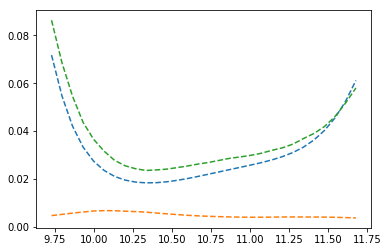

In [38]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [39]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summary_rmshared_revised.csv'))

In [40]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.07,9.8e-4,0.11,9.1e-5,4.8e-3,0.02,0.09,0.42,13374,1.0,0.067940,9.729482
1,prob01[2],0.1,1.3e-3,0.15,1.4e-4,7.6e-3,0.04,0.14,0.56,13203,1.0,0.077608,9.729482
2,prob01[3],0.15,1.7e-3,0.19,2.1e-4,0.01,0.06,0.2,0.69,12685,1.0,0.087275,9.729482
3,prob01[4],0.19,2.1e-3,0.23,3.1e-4,0.02,0.09,0.29,0.8,12040,1.0,0.096943,9.729482
4,prob01[5],0.24,2.5e-3,0.26,4.3e-4,0.03,0.13,0.39,0.88,11374,1.0,0.106610,9.729482
5,prob01[6],0.29,2.8e-3,0.29,5.5e-4,0.04,0.18,0.5,0.92,10769,1.0,0.116278,9.729482
6,prob01[7],0.34,3.1e-3,0.31,7.2e-4,0.05,0.24,0.59,0.95,10202,1.0,0.125946,9.729482
7,prob01[8],0.38,3.3e-3,0.33,9.4e-4,0.07,0.31,0.68,0.97,9737,1.0,0.135613,9.729482
8,prob01[9],0.43,3.5e-3,0.34,1.2e-3,0.09,0.38,0.75,0.98,9367,1.0,0.145281,9.729482
9,prob01[10],0.46,3.7e-3,0.35,1.5e-3,0.11,0.45,0.81,0.99,9078,1.0,0.154948,9.729482


In [41]:
prob01_stan = summary_stan.iloc[:900, :]

In [42]:
prob01_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.07,9.8e-4,0.11,9.1e-5,4.8e-3,0.02,0.09,0.42,13374,1.0,0.067940,9.729482
1,prob01[2],0.1,1.3e-3,0.15,1.4e-4,7.6e-3,0.04,0.14,0.56,13203,1.0,0.077608,9.729482
2,prob01[3],0.15,1.7e-3,0.19,2.1e-4,0.01,0.06,0.2,0.69,12685,1.0,0.087275,9.729482
3,prob01[4],0.19,2.1e-3,0.23,3.1e-4,0.02,0.09,0.29,0.8,12040,1.0,0.096943,9.729482
4,prob01[5],0.24,2.5e-3,0.26,4.3e-4,0.03,0.13,0.39,0.88,11374,1.0,0.106610,9.729482
5,prob01[6],0.29,2.8e-3,0.29,5.5e-4,0.04,0.18,0.5,0.92,10769,1.0,0.116278,9.729482
6,prob01[7],0.34,3.1e-3,0.31,7.2e-4,0.05,0.24,0.59,0.95,10202,1.0,0.125946,9.729482
7,prob01[8],0.38,3.3e-3,0.33,9.4e-4,0.07,0.31,0.68,0.97,9737,1.0,0.135613,9.729482
8,prob01[9],0.43,3.5e-3,0.34,1.2e-3,0.09,0.38,0.75,0.98,9367,1.0,0.145281,9.729482
9,prob01[10],0.46,3.7e-3,0.35,1.5e-3,0.11,0.45,0.81,0.99,9078,1.0,0.154948,9.729482


In [43]:
chosen_mass = np.unique(prob01_stan['LOG_STELLAR_MASS'].values)[0]

In [44]:
chosen_mass

9.729482

In [45]:
subset_temp = prob01_stan[prob01_stan['LOG_STELLAR_MASS']==chosen_mass]

In [46]:
subset_temp

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.07,9.8e-4,0.11,9.1e-5,4.8e-3,0.02,0.09,0.42,13374,1.0,0.067940,9.729482
1,prob01[2],0.1,1.3e-3,0.15,1.4e-4,7.6e-3,0.04,0.14,0.56,13203,1.0,0.077608,9.729482
2,prob01[3],0.15,1.7e-3,0.19,2.1e-4,0.01,0.06,0.2,0.69,12685,1.0,0.087275,9.729482
3,prob01[4],0.19,2.1e-3,0.23,3.1e-4,0.02,0.09,0.29,0.8,12040,1.0,0.096943,9.729482
4,prob01[5],0.24,2.5e-3,0.26,4.3e-4,0.03,0.13,0.39,0.88,11374,1.0,0.106610,9.729482
5,prob01[6],0.29,2.8e-3,0.29,5.5e-4,0.04,0.18,0.5,0.92,10769,1.0,0.116278,9.729482
6,prob01[7],0.34,3.1e-3,0.31,7.2e-4,0.05,0.24,0.59,0.95,10202,1.0,0.125946,9.729482
7,prob01[8],0.38,3.3e-3,0.33,9.4e-4,0.07,0.31,0.68,0.97,9737,1.0,0.135613,9.729482
8,prob01[9],0.43,3.5e-3,0.34,1.2e-3,0.09,0.38,0.75,0.98,9367,1.0,0.145281,9.729482
9,prob01[10],0.46,3.7e-3,0.35,1.5e-3,0.11,0.45,0.81,0.99,9078,1.0,0.154948,9.729482


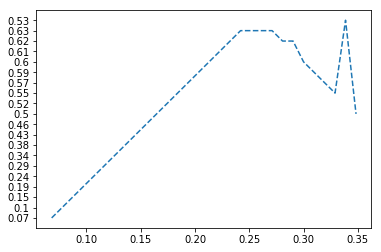

In [47]:
plt.plot(subset_temp['Z'].values, subset_temp['mean'].values, '--')
# plt.plot(subset_temp['Z'].values, subset_temp['25%'].values, '--')
# plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
# plt.yticks(list(np.arange(start=0., stop=1., step=0.02)))
plt.show()

In [48]:
%matplotlib notebook

<IPython.core.display.Javascript object>


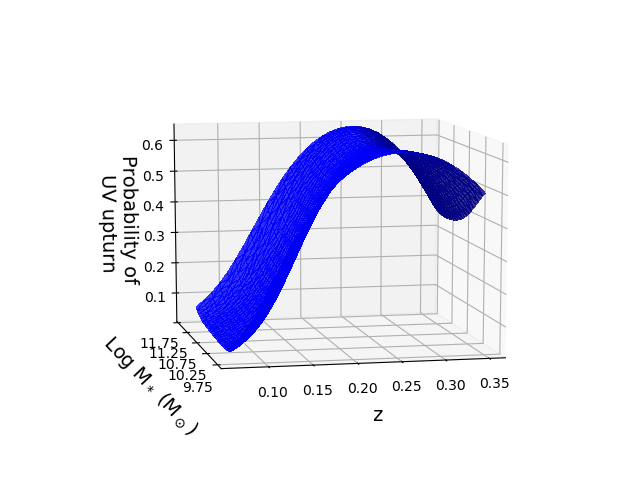

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
#                 linewidth=0, antialiased=False)
ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
plt.show()

<IPython.core.display.Javascript object>


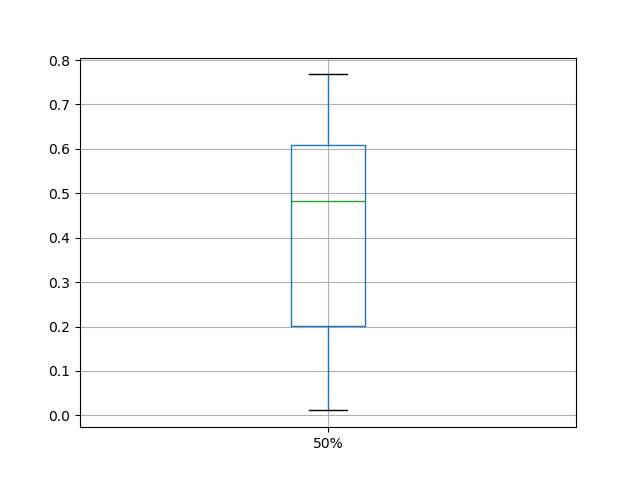

In [50]:
prob01.boxplot(column='50%')

<IPython.core.display.Javascript object>


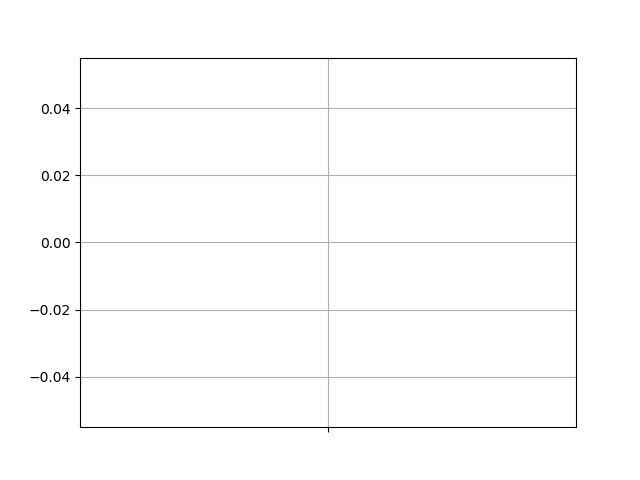

In [51]:
pd.DataFrame(prob01_stan['50%']).boxplot()

# Last check to be 100% sure (for one class - class 1 - lineless)

In [52]:
m = 1
z = np.arange(0., 0.5, 0.01)
p = posteriors

In [53]:
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))

        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [54]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [55]:
regression_df = pd.DataFrame(regression)
regression_df.columns = ['probability', 'redshift', 'iteration']

In [56]:
regression_df[regression_df['redshift']==0.2]

,probability,redshift,iteration
20,0.627362,0.2,0.0
70,0.546013,0.2,1.0
120,0.531681,0.2,2.0
170,0.532898,0.2,3.0
220,0.542236,0.2,4.0
270,0.554240,0.2,5.0
320,0.607240,0.2,6.0
370,0.437181,0.2,7.0
420,0.483175,0.2,8.0
470,0.520381,0.2,9.0


<IPython.core.display.Javascript object>


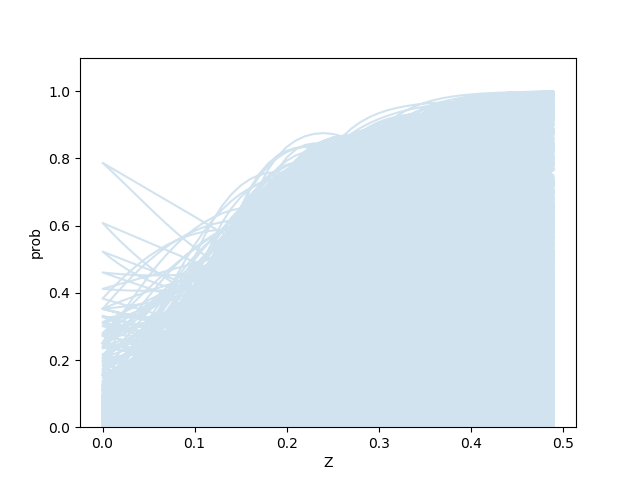

In [57]:
plt.plot(redsh, prob, '-', alpha=0.2)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()